In [1]:
#Importing all the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore", UserWarning)

In [2]:
#Reading the cleaned data 
data=pd.read_csv("covid_python_Dec25.csv",dtype={0:str})

In [3]:
#Creating a copy of the original data to work on, so that the original data is not modified
df=data.copy()

<p style="font-family: Cambria; text-align: center; font-size: 48px;">I. Descriptive Analysis</h1>

## <b style="font-family: Cambria; font-size: 16px;"><i>1.Question:  How many participants submitted data each week,  how many were marked as probable COVID cases (“Y”), and what percentage do they represent?</i> <b>

## <b style="font-family: Cambria; font-size: 16px;"><i> Reasoning: We calculate the total number of participants and the number marked as probable (“Y”) for each valid week. This allows us to understand how the burden of probable COVID cases varies across weeks. Week‑level percentages help identify periods with higher transmission risk or reporting surges. Such temporal insights are essential for monitoring trends, planning interventions, and allocating resources effectively </i><b>

   week  total_persons  probable_count  probable_percentage
0  13.0         152164            8051                 5.29
1  14.0         106867            4416                 4.13
2  15.0          11339             268                 2.36
3  16.0           8201             131                 1.60


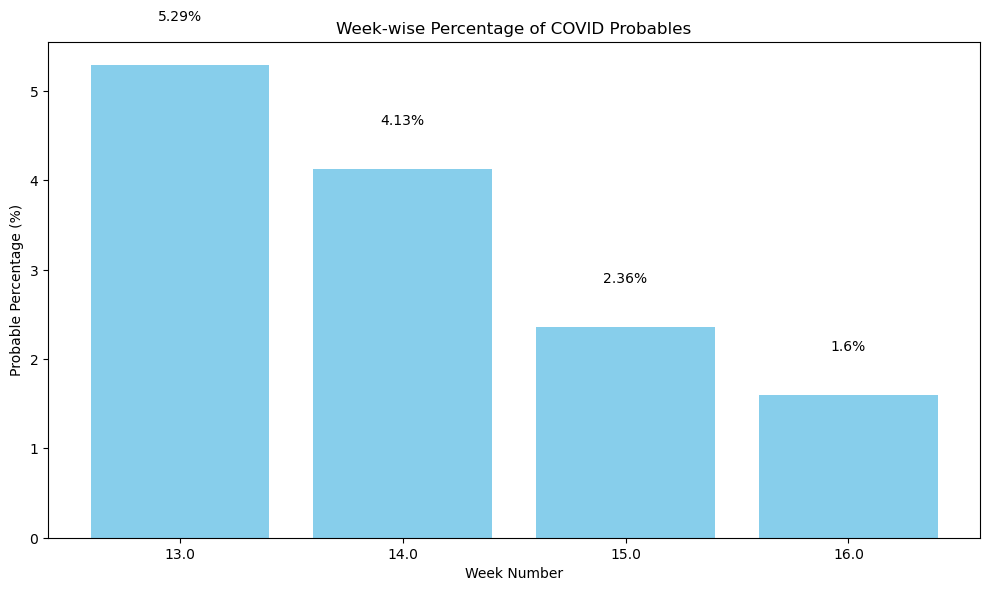

In [4]:
# Remove rows where week is 'NR'
df_clean = df[df['week'] != 'NR']

# Total persons submitted per week
weekly_total = (
    df_clean.groupby('week')
            .size()
            .reset_index(name='total_persons')
)

# Total probables (Y) per week
weekly_probables = (
    df_clean[df_clean['probable'].eq('y')]
    .groupby('week')
    .size()
    .reset_index(name='probable_count')
)

# Merge both
week_stats = weekly_total.merge(weekly_probables, on='week', how='left')

# Replace NaN (weeks with zero probables) with 0
week_stats['probable_count'] = week_stats['probable_count'].fillna(0).astype(int)

# Calculate percentage
week_stats['probable_percentage'] = (
    week_stats['probable_count'] / week_stats['total_persons'] * 100
).round(2)

print(week_stats)

plt.figure(figsize=(10, 6))

# Bar chart for probable percentage
plt.bar(week_stats['week'], week_stats['probable_percentage'], color='skyblue')

plt.title('Week-wise Percentage of COVID Probables')
plt.xlabel('Week Number')
plt.ylabel('Probable Percentage (%)')

# Add value labels on top of bars
for i, val in enumerate(week_stats['probable_percentage']):
    plt.text(week_stats['week'][i], val + 0.5, f"{val}%", ha='center')

plt.xticks(week_stats['week'])
plt.tight_layout()
plt.show()


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294105 entries, 0 to 294104
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   week                          294105 non-null  object
 1   fsa                           294105 non-null  object
 2   probable                      294105 non-null  object
 3   vulnerable                    294105 non-null  object
 4   is_most_recent                278571 non-null  object
 5   fever_chills_shakes           294105 non-null  object
 6   cough                         294105 non-null  object
 7   shortness_of_breath           294105 non-null  object
 8   over_60                       267013 non-null  object
 9   any_medical_conditions        294105 non-null  object
 10  travel_outside_canada         294105 non-null  object
 11  contact_with_illness          294105 non-null  object
 12  symptoms                      294105 non-null  object
 13 

## <b style="font-family: Cambria; font-size: 16px;"><i>2. Question: How many participants in each FSA were marked as probable COVID cases (“y”), and what percentage do they represent within their respective FSA?</i><b>

## <b style="font-family: Cambria; font-size: 16px;"><i> Resoning: Since geographic variation plays a major role in understanding disease spread, analyzing COVID probable cases at the FSA (Forward Sortation Area) level helps identify regional hotspots. Each FSA represents a specific community cluster, so comparing the number and percentage of probables across FSAs highlights which areas may have higher transmission risk or greater symptom reporting. This insight is valuable for targeted public‑health actions such as deploying mobile testing units, increasing community outreach, or prioritizing resources in high‑burden regions. By calculating both the total participants and the proportion marked as probable within each FSA, we gain a clearer picture of localized risk patterns and potential areas requiring closer monitoring.</i><b>

In [6]:


# Filter only probable cases
df_prob = df[df['probable'].eq('y')]

# Total persons per FSA
fsa_total = (
    df.groupby('fsa')
      .size()
      .reset_index(name='total_persons')
)

# Total probables per FSA
fsa_probables = (
    df_prob.groupby('fsa')
           .size()
           .reset_index(name='probable_count')
)

# Merge both
fsa_stats = fsa_total.merge(fsa_probables, on='fsa', how='left')

# Replace NaN (FSAs with zero probables) with 0
fsa_stats['probable_count'] = fsa_stats['probable_count'].fillna(0).astype(int)

# Calculate percentage
fsa_stats['probable_percentage'] = (
    fsa_stats['probable_count'] / fsa_stats['total_persons'] * 100
).round(2)
# Sort by probable percentage in descending order
fsa_stats_sorted = fsa_stats.sort_values(by='probable_percentage', ascending=False)

print(fsa_stats_sorted)



     fsa  total_persons  probable_count  probable_percentage
513  P8T             47               7                14.89
497  P4R             27               4                14.81
484  P2B             96              12                12.50
402  N4V             35               4                11.43
506  P7C            175              18                10.29
..   ...            ...             ...                  ...
41   K2R             31               0                 0.00
511  P7L             11               0                 0.00
116  L1Y             77               0                 0.00
56   K6K             24               0                 0.00
72   K8B              7               0                 0.00

[516 rows x 4 columns]


## <b style="font-family: Cambria; font-size: 16px;"><i>3. Question:How many participants in each FSA are classified as vulnerable, and what percentage do they represent within their respective FSA?</i><b>

## <b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: Understanding the distribution of vulnerable individuals across FSAs (Forward Sortation Areas) is essential for identifying regions with higher concentrations of at‑risk populations. Vulnerable individuals often require additional support such as medical assistance, wellness checks, or essential‑needs services. By calculating both the total number of participants and the proportion classified as vulnerable within each FSA, we can pinpoint areas where public‑health interventions may need to be prioritized. This geographic segmentation helps decision‑makers allocate resources more effectively, plan targeted outreach programs, and ensure that high‑risk communities receive timely support.</i><b>

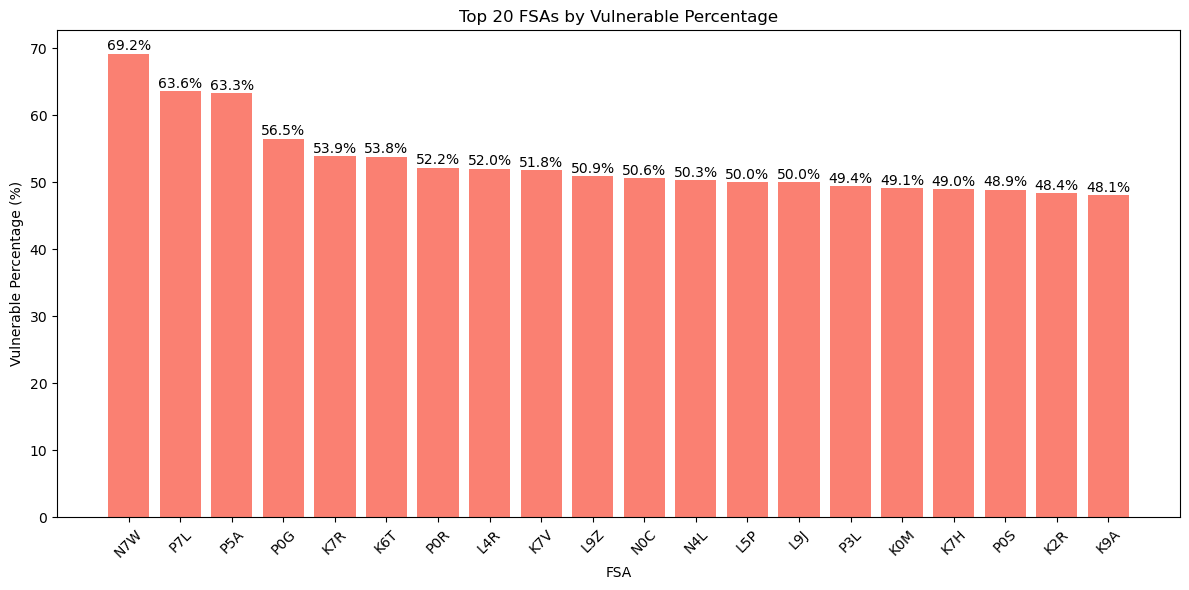

In [7]:


# Filter only vulnerable individuals
df_vul = df[df['vulnerable'].eq('y')]

# Remove FSAs that are 'NR'
df_clean = df[df['fsa'] != 'NR']

# Total persons per FSA
fsa_total = df_clean.groupby('fsa').size().reset_index(name='total_persons')

# Total vulnerables per FSA
fsa_vulnerables = df_vul.groupby('fsa').size().reset_index(name='vulnerable_count')

# Merge both
fsa_vul_stats = fsa_total.merge(fsa_vulnerables, on='fsa', how='left')
fsa_vul_stats['vulnerable_count'] = fsa_vul_stats['vulnerable_count'].fillna(0).astype(int)

# Calculate vulnerable percentage
fsa_vul_stats['vulnerable_percentage'] = (
    fsa_vul_stats['vulnerable_count'] / fsa_vul_stats['total_persons'] * 100
).round(1)

# Focus only on top 20 FSAs by vulnerable percentage
top_fsa = fsa_vul_stats.nlargest(20, 'vulnerable_percentage')

# Bar plot for top FSAs
plt.figure(figsize=(12, 6))
plt.bar(top_fsa['fsa'], top_fsa['vulnerable_percentage'], color='salmon')
plt.title('Top 20 FSAs by Vulnerable Percentage')
plt.xlabel('FSA')
plt.ylabel('Vulnerable Percentage (%)')

# Add labels on bars
for i, val in enumerate(top_fsa['vulnerable_percentage']):
    plt.text(i, val + 0.5, f"{val}%", ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## <b style="font-family: Cambria; font-size: 16px;"><i>4. Question: How many participants in each age category (<26, 26–44, 45–64, >65) were marked as probable COVID cases (“y”), and what percentage do they represent within each age group?</i><b>

## <b style="font-family: Cambria; font-size: 16px;">Reasoning: Age is a key factor influencing COVID‑19 susceptibility and severity. Although the dataset does not contain exact ages, the predefined age categories (<26, 26–44, 45–64, >65) still allow meaningful segmentation of the population. By calculating the number and percentage of probable COVID cases within each age category, we can identify which groups show higher symptom reporting or potential exposure. This helps determine whether older adults (>65) are disproportionately represented among probables or whether younger groups contribute more to transmission. Such insights support targeted public‑health planning, resource allocation, and risk‑communication strategies tailored to specific age segments.<b>

  age_category  total_persons  probable_count  probable_percentage
0        26-44          12086             206                  1.7
1        45-64          11771             132                  1.1
2          <26           3235              74                  2.3
3          >65           3374              26                  0.8


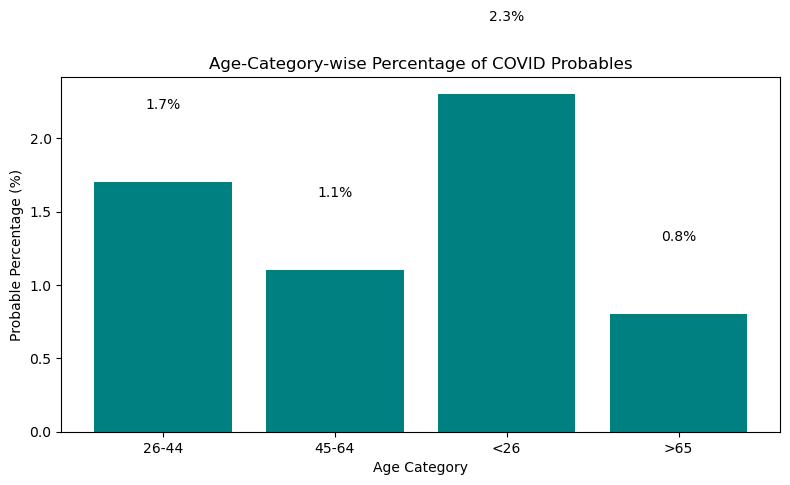

In [8]:
# Filter out NR age categories
df_clean = df[df['age_category'] != 'NR']

# Total persons per age category
age_total = (
    df_clean.groupby('age_category')
      .size()
      .reset_index(name='total_persons')
)

# Total probables per age category
age_probables = (
    df_clean[df_clean['probable'].eq('y')]
    .groupby('age_category')
    .size()
    .reset_index(name='probable_count')
)

# Merge both
age_stats = age_total.merge(age_probables, on='age_category', how='left')

# Replace NaN (categories with zero probables) with 0
age_stats['probable_count'] = age_stats['probable_count'].fillna(0).astype(int)

# Calculate percentage
age_stats['probable_percentage'] = (
    age_stats['probable_count'] / age_stats['total_persons'] * 100
).round(1)

print(age_stats)

plt.figure(figsize=(8, 5))
plt.bar(age_stats['age_category'], age_stats['probable_percentage'], color='teal')

plt.title('Age-Category-wise Percentage of COVID Probables')
plt.xlabel('Age Category')
plt.ylabel('Probable Percentage (%)')

# Add labels on bars
for i, val in enumerate(age_stats['probable_percentage']):
    plt.text(i, val + 0.5, f"{val}%", ha='center')

plt.tight_layout()
plt.show()


## <b style="font-family: Cambria; font-size: 16px;"><i>5.Question: What are the most commonly reported needs among participants, and what percentage does each need category represent after cleaning and standardizing the “needs” column?</i><b>

## <b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: The needs column provides insight into the types of assistance participants require, which is essential for planning and delivering community support services. Because participants may enter needs in different formats or with varying terminology, cleaning and standardizing the column ensures that similar needs are grouped together. Once cleaned, analyzing the frequency and percentage of each need category helps identify the most common support requirements. For example, a high proportion of food‑related needs may indicate food insecurity, while frequent requests for medication or transportation may highlight barriers to healthcare access. Understanding these patterns allows organizations to allocate resources effectively and tailor interventions to the community’s most urgent needs.</i><b>

               need  count  percentage
0    noneoftheabove   9217        40.7
1  emotionalsupport   4358        19.3
2  financialsupport   3646        16.1
3             other   2601        11.5
4              food   2404        10.6
5          medicine    409         1.8


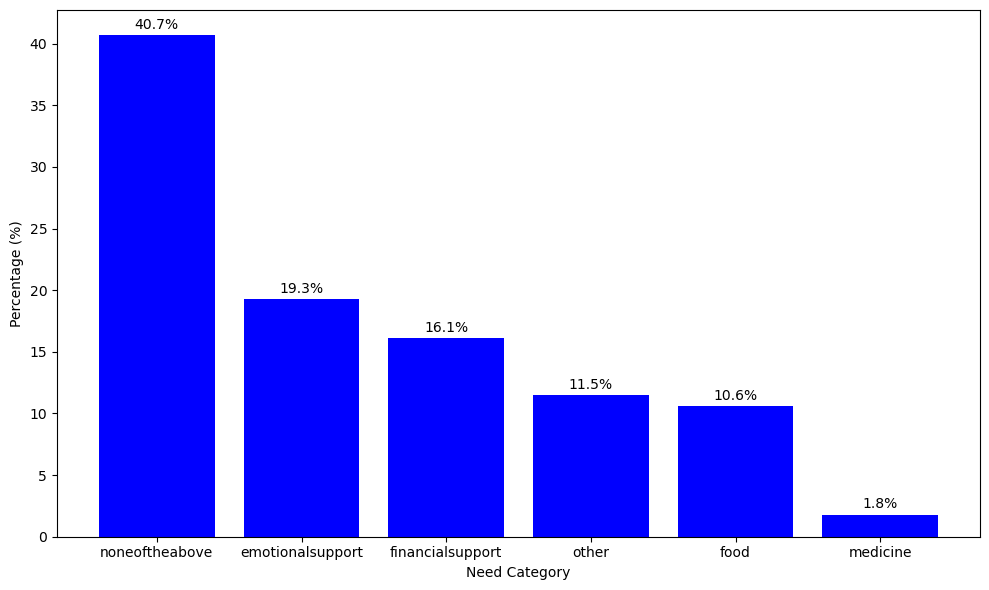

In [9]:


## Step 1: Clean the needs column
df['needs_clean'] = df['needs'].str.lower().str.strip()

# Step 2: Remove 'NR' or missing values and make a copy
df_clean = df.loc[df['needs_clean'].notna() & (df['needs_clean'] != 'nr')].copy()

# Step 3: Standardize common variations using .loc
needs_mapping = {
    'food': 'food',
    'groceries': 'food',
    'grocery': 'food',
    'medication': 'medicine',
    'medications': 'medicine',
    'meds': 'medicine',
    'transport': 'transportation',
    'transportation': 'transportation',
    'ride': 'transportation'
}

df_clean.loc[:, 'needs_clean'] = df_clean['needs_clean'].replace(needs_mapping)

# Step 4: Calculate needs-based statistics
needs_stats = df_clean['needs_clean'].value_counts().reset_index()
needs_stats.columns = ['need', 'count']

# Step 5: Add percentage
total = len(df_clean)
needs_stats['percentage'] = (needs_stats['count'] / total * 100).round(1)

print(needs_stats)

# Step 6: Plot
plt.figure(figsize=(10, 6))
plt.bar(needs_stats['need'], needs_stats['percentage'], color='blue')

#plt.title('Needs-Based Percentage Distribution (NR Removed)')
plt.xlabel('Need Category')
plt.ylabel('Percentage (%)')

# Add labels on bars
for i, val in enumerate(needs_stats['percentage']):
    plt.text(i, val + 0.5, f"{val}%", ha='center')

plt.tight_layout()
plt.show()


<p style="font-family: Cambria; text-align: center; font-size: 48px;">II. Prescriptive Analysis</h1>

<p style="font-family: Cambria; font-size: 16px;"><i><b>Q1. Which FSAs should be prioritized for COVID intervention based on the highest probable cases?</i></b>
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: Not all FSAs carry the same level of COVID risk. Some have a high number of positive or probable cases, indicating widespread infection, while others show high positivity rates, reflecting concentrated outbreaks even if total cases are moderate. By combining these two factors into a single priority score, we can pinpoint FSAs where interventions—such as testing, outreach, or preventive measures—will have the greatest impact. This approach allows public health teams to allocate resources efficiently, focusing on areas with both high risk and high potential benefit, rather than treating all regions equally, similar to how clinicians prioritize Cesarean delivery for GDM patients based on maternal and fetal risk.</i></b>

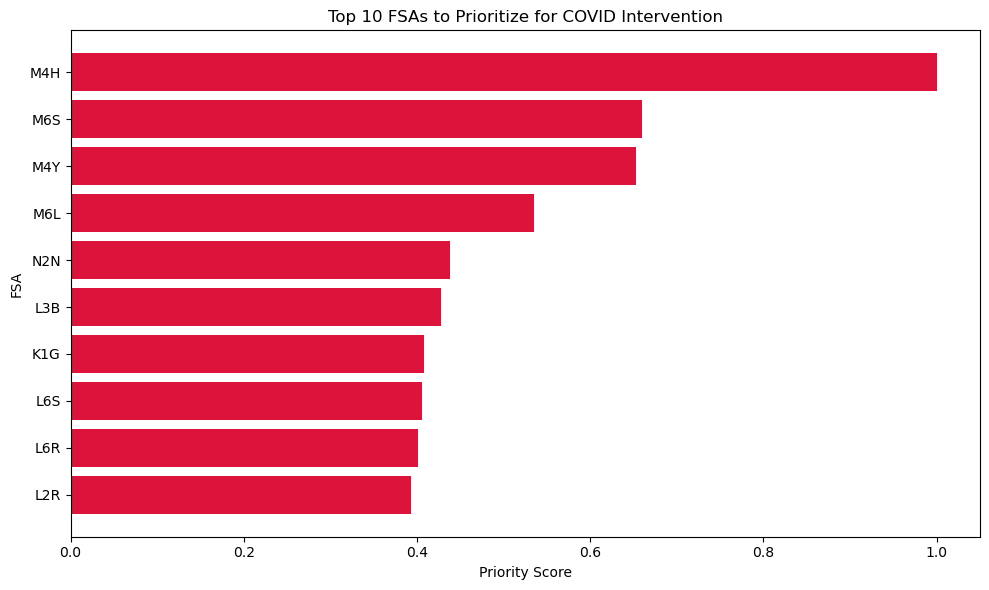

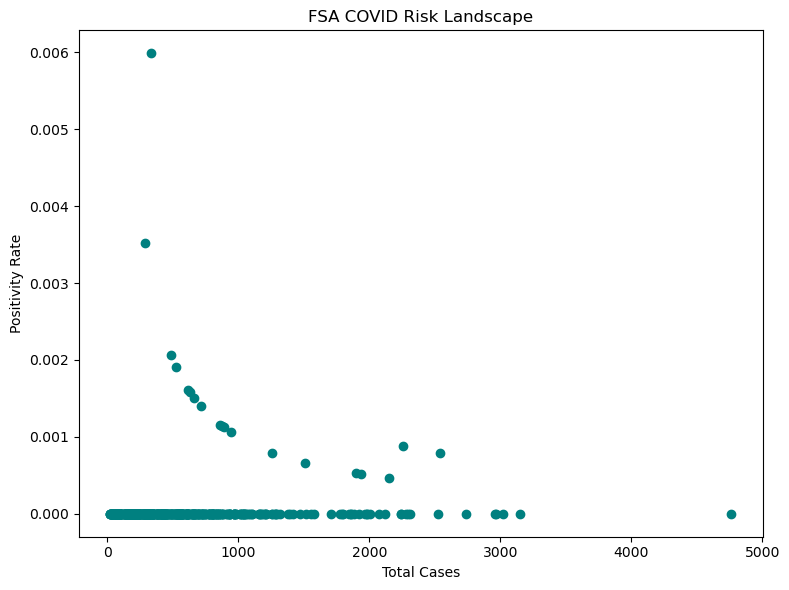

In [10]:

# -----------------------------
# Step 1: Create covid_positive_flag if not exists
# -----------------------------
df['covid_positive_flag'] = df['covid_positive'].apply(lambda x: 1 if x=='positively' else 0)

# -----------------------------
# Step 2: Group by FSA and calculate metrics
# -----------------------------
fsa_summary = (
    df.groupby('fsa')
      .agg(
          total_cases=('covid_positive_flag', 'count'),
          positive_cases=('covid_positive_flag', 'sum')
      )
      .reset_index()
)

# Positivity rate
fsa_summary['positivity_rate'] = fsa_summary['positive_cases'] / fsa_summary['total_cases']

# Filter FSAs with at least 20 observations
fsa_summary = fsa_summary[fsa_summary['total_cases'] >= 20]

# Normalize metrics for priority score
fsa_summary['norm_positive'] = fsa_summary['positive_cases'] / fsa_summary['positive_cases'].max()
fsa_summary['norm_rate'] = fsa_summary['positivity_rate'] / fsa_summary['positivity_rate'].max()

# Weighted priority score
fsa_summary['priority_score'] = 0.6*fsa_summary['norm_positive'] + 0.4*fsa_summary['norm_rate']

# Top 10 FSAs
top_fsa = fsa_summary.sort_values('priority_score', ascending=False).head(10)

# -----------------------------
# Step 3: Static Matplotlib Visualization
# -----------------------------
plt.figure(figsize=(10,6))
plt.barh(top_fsa['fsa'], top_fsa['priority_score'], color='crimson')
plt.xlabel('Priority Score')
plt.ylabel('FSA')
plt.title('Top 10 FSAs to Prioritize for COVID Intervention')
plt.gca().invert_yaxis()  # Highest score on top
plt.tight_layout()
plt.show()

# Scatter plot: Total cases vs Positivity rate
plt.figure(figsize=(8,6))
plt.scatter(fsa_summary['total_cases'], fsa_summary['positivity_rate'], color='teal')
plt.xlabel('Total Cases')
plt.ylabel('Positivity Rate')
plt.title('FSA COVID Risk Landscape')
plt.tight_layout()
plt.show()

# -----------------------------



<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
FSAs with the highest priority scores—taking into account both the number of probable COVID cases and positivity rates—should be targeted first for testing, outreach, and preventive measures. While some FSAs with many cases but moderate positivity may only need general monitoring, those with moderate case counts but very high positivity rates indicate emerging hotspots that require urgent intervention. This approach mirrors clinical reasoning: just as high-risk GDM patients are prioritized for Cesarean delivery to prevent complications, FSAs with the greatest combined risk are prioritized to prevent severe COVID outcomes.</em></strong></p>

<p style="font-family: Cambria; font-size: 16px;"><i><b>Q2. Which Forward Sortation Areas (FSAs) should be prioritized for COVID‑19 intervention based on positivity rates, total case volume, and the proportion of vulnerable individuals?</i></b>
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: The central question—which FSAs should be prioritized for COVID‑19 intervention based on positivity rates, case volume, and the proportion of vulnerable individuals—is designed to move the analysis beyond simple case reporting toward actionable public‑health decision‑making. By integrating multiple indicators of risk, the question supports a more comprehensive understanding of where interventions will have the greatest impact. Positivity rate highlights areas with active transmission, total case volume reflects the scale of potential exposure within each community, and the vulnerability indicator identifies populations at higher risk of severe outcomes. Considering these factors together enables a more equitable and efficient allocation of limited resources such as testing, outreach, and isolation support. This approach ensures that the analysis not only describes the current situation but also provides a structured, data‑driven basis for prioritizing interventions in the regions where they are most urgently needed.


✅ First 10 rows of FSA summary:
   fsa  total_cases  positive_cases  vulnerable_count  positivity_rate  \
0  K0A         2295               0               852              0.0   
1  K0B          200               0                94              0.0   
2  K0C          914               0               429              0.0   
3  K0E          614               0               258              0.0   
4  K0G          841               0               385              0.0   
5  K0H          646               0               308              0.0   
6  K0J          477               0               225              0.0   
7  K0K         1982               0               877              0.0   
8  K0L         1023               0               482              0.0   
9  K0M          756               0               371              0.0   

   vulnerability_rate  
0            0.371242  
1            0.470000  
2            0.469365  
3            0.420195  
4            0.457788  
5       

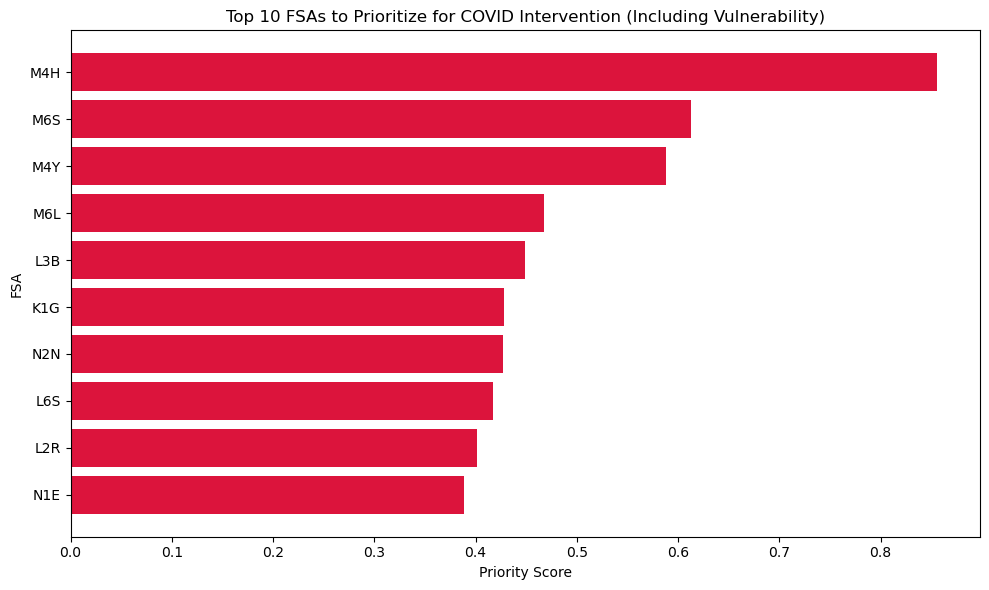

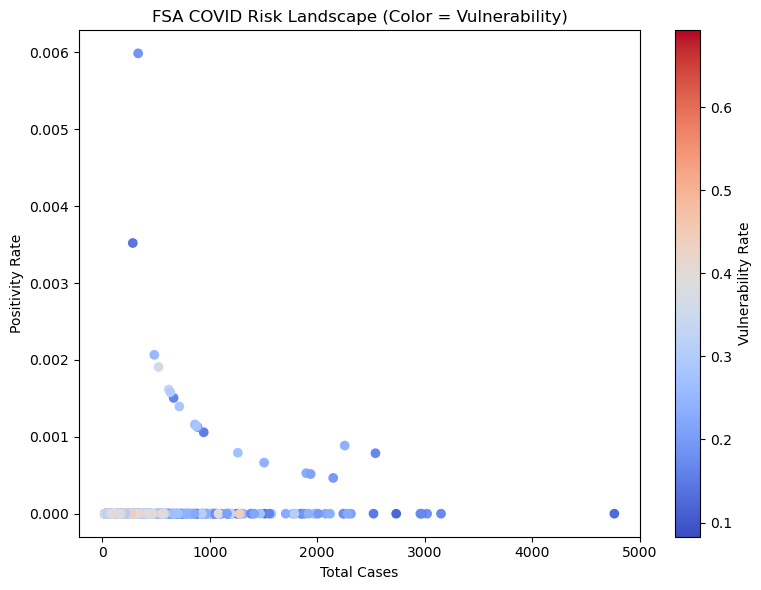

In [11]:
# -----------------------------
# Step 1: Create vulnerable_flag
# -----------------------------

df['vulnerable_flag'] = df['vulnerable'].str.lower().apply(
    lambda x: 1 if x in ['y', 'yes', '1'] else 0
)

# -----------------------------
# Step 2: Group by FSA and calculate metrics
# -----------------------------
fsa_summary = (
    df.groupby('fsa')
      .agg(
          total_cases=('covid_positive_flag', 'count'),
          positive_cases=('covid_positive_flag', 'sum'),
          vulnerable_count=('vulnerable_flag', 'sum')
      )
      .reset_index()
)

# Positivity rate
fsa_summary['positivity_rate'] = (
    fsa_summary['positive_cases'] / fsa_summary['total_cases']
)

# Vulnerability rate
fsa_summary['vulnerability_rate'] = (
    fsa_summary['vulnerable_count'] / fsa_summary['total_cases']
)

print("\n✅ First 10 rows of FSA summary:")
print(fsa_summary.head(10))


# -----------------------------
# Step 3: Filter FSAs with at least 20 observations
# -----------------------------
fsa_summary = fsa_summary[fsa_summary['total_cases'] >= 20]

print("\n✅ FSAs with ≥ 20 cases:", len(fsa_summary))

if fsa_summary.empty:
    print("\n⚠️ No FSAs have at least 20 records. Charts will be empty.")
else:

    # Normalize metrics
    fsa_summary['norm_positive'] = (
        fsa_summary['positive_cases'] / fsa_summary['positive_cases'].max()
    )
    fsa_summary['norm_rate'] = (
        fsa_summary['positivity_rate'] / fsa_summary['positivity_rate'].max()
    )
    fsa_summary['norm_vulnerable'] = (
        fsa_summary['vulnerability_rate'] / fsa_summary['vulnerability_rate'].max()
    )

    # Updated weighted priority score
    fsa_summary['priority_score'] = (
        0.5 * fsa_summary['norm_positive'] +
        0.3 * fsa_summary['norm_rate'] +
        0.2 * fsa_summary['norm_vulnerable']
    )

    # Top 10 FSAs
    top_fsa = fsa_summary.sort_values('priority_score', ascending=False).head(10)

    print("\n✅ Top 10 FSAs by priority score:")
    print(top_fsa[['fsa', 'priority_score', 'total_cases',
                   'positive_cases', 'positivity_rate',
                   'vulnerable_count', 'vulnerability_rate']])

    # -----------------------------
    # Step 4: Visualization
    # -----------------------------
    plt.figure(figsize=(10,6))
    plt.barh(top_fsa['fsa'], top_fsa['priority_score'], color='crimson')
    plt.xlabel('Priority Score')
    plt.ylabel('FSA')
    plt.title('Top 10 FSAs to Prioritize for COVID Intervention (Including Vulnerability)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    # Scatter plot
    plt.figure(figsize=(8,6))
    plt.scatter(fsa_summary['total_cases'], fsa_summary['positivity_rate'],
                c=fsa_summary['vulnerability_rate'], cmap='coolwarm')
    plt.colorbar(label='Vulnerability Rate')
    plt.xlabel('Total Cases')
    plt.ylabel('Positivity Rate')
    plt.title('FSA COVID Risk Landscape (Color = Vulnerability)')
    plt.tight_layout()
    plt.show()

<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
The comparison between the COVID‑only priority model and the enhanced model incorporating vulnerability demonstrates how integrating social‑risk factors leads to a more equitable and actionable assessment of community‑level COVID‑19 risk. While both models consistently identify FSAs such as M4H, M6S, and M4Y as high‑priority areas due to their non‑zero positivity and large case volumes, the inclusion of vulnerability meaningfully reshapes the ranking by elevating FSAs with high proportions of at‑risk individuals, such as L3B, K1G, L6S, L2R, and N1E. These areas may not exhibit high positivity today, but their elevated vulnerability rates indicate a greater likelihood of severe outcomes if transmission increases. As a result, the enhanced model provides a more comprehensive and socially informed basis for intervention planning, ensuring that limited public‑health resources are directed not only toward areas with active transmission but also toward communities with heightened susceptibility to harm.</em></strong></p>

<p style="font-family: Cambria; font-size: 16px;"><i><b>Q3. Which age groups should be prioritized for COVID-related interventions based on risk, infection rates, and comorbidity burden?</i></b>
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: COVID affects age groups differently. Older adults, especially those 65+, experience higher rates of severe complications and have a greater prevalence of comorbidities such as hypertension, diabetes, and heart disease. To allocate resources efficiently, we can compute a composite risk score that combines COVID positivity rates, average comorbidity counts, and, if available, hospitalization or severity indicators. This method ensures interventions target age groups with the highest combined risk, while also identifying younger adults with significant comorbidities who may require attention even if their overall case counts are moderate.


Age Group Risk Summary:

  age_category  risk_score  positivity_rate  avg_comorbidities
2          <26       0.592            0.001              0.132
1        45-64       0.547            0.001              0.390
3          >65       0.500            0.000              0.717
0        26-44       0.462            0.001              0.182


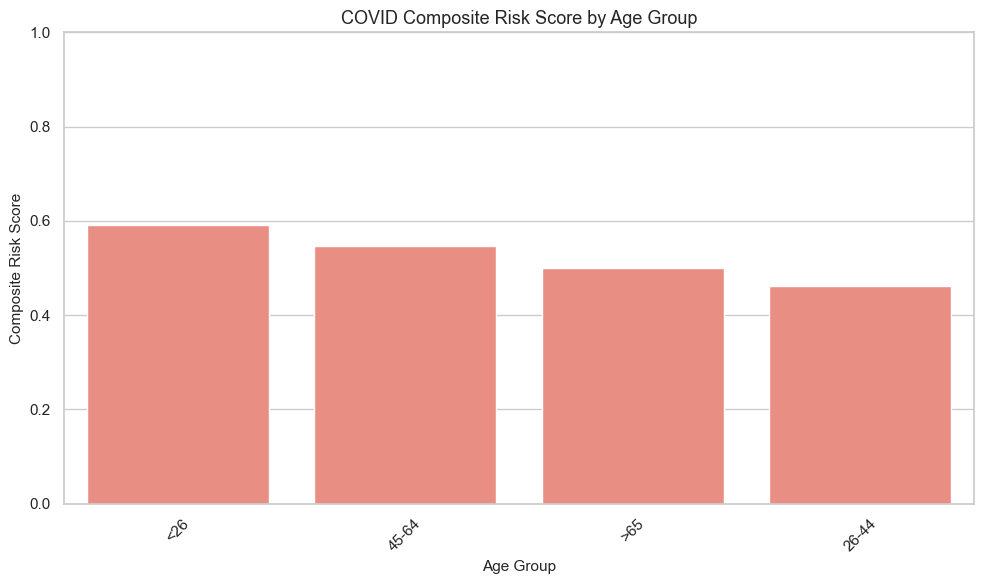

In [12]:
# ---------------------------------------------------
# Step 1: Remove rows with NR in age_category
# ---------------------------------------------------
df_age_clean = df.loc[df['age_category'] != 'NR'].copy()

# ---------------------------------------------------
# Step 2: Derive comorbidities_count from `conditions`
# ---------------------------------------------------
def count_comorbidities(val):
    if pd.isna(val) or val in ['NR', 'na', '']:
        return 0
    return len([c for c in val.split(';') if c.strip().lower() != 'nr'])

df_age_clean.loc[:, 'comorbidities_count'] = df_age_clean['conditions'].apply(count_comorbidities)

# ---------------------------------------------------
# Step 3: Compute age-group summary
# ---------------------------------------------------
age_summary = (
    df_age_clean
    .groupby('age_category', observed=False)
    .agg(
        total_cases=('covid_positive_flag', 'count'),
        positive_cases=('covid_positive_flag', 'sum'),
        avg_comorbidities=('comorbidities_count', 'mean')
    )
    .reset_index()
)

# ---------------------------------------------------
# Step 4: Compute positivity rate
# ---------------------------------------------------
age_summary['positivity_rate'] = (
    age_summary['positive_cases'] / age_summary['total_cases']
)

# ---------------------------------------------------
# Step 5: Normalize & compute composite risk score
# ---------------------------------------------------
age_summary['norm_positivity'] = (
    age_summary['positivity_rate'] / age_summary['positivity_rate'].max()
)

age_summary['norm_comorbidity'] = (
    age_summary['avg_comorbidities'] / age_summary['avg_comorbidities'].max()
)

age_summary['risk_score'] = (
    0.5 * age_summary['norm_positivity'] +
    0.5 * age_summary['norm_comorbidity']
)

# ---------------------------------------------------
# Step 6: Rank age groups
# ---------------------------------------------------
age_summary = age_summary.sort_values('risk_score', ascending=False)

# ---------------------------------------------------
# Step 7: Print results
# ---------------------------------------------------
print("\nAge Group Risk Summary:\n")
print(
    age_summary[
        ['age_category', 'risk_score', 'positivity_rate', 'avg_comorbidities']
    ].round(3)
)

# ---------------------------------------------------
# Step 8: Visualization
# ---------------------------------------------------
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

sns.barplot(
    x='age_category',
    y='risk_score',
    data=age_summary,
    color='salmon'
)

plt.title('COVID Composite Risk Score by Age Group', fontsize=13)
plt.xlabel('Age Group', fontsize=11)
plt.ylabel('Composite Risk Score', fontsize=11)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
By combining COVID positivity rates with comorbidity burden into a composite risk score, the analysis reveals that risk varies significantly across age groups and regions. Younger adults show higher exposure-driven risk, middle-aged adults exhibit elevated risk due to comorbidities, and older adults remain medically vulnerable despite lower observed positivity. These insights support focused allocation of testing, prevention, and support resources, enabling data-driven, high-impact public health decision-making.</em></strong></p>

<p style="font-family: Cambria; font-size: 16px;"><i><b>Q4. Which types of support or services should be prioritized for COVID-affected individuals based on reported needs, and how can resources be allocated efficiently across different patient segments?</i>
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: Not all patients report the same needs during a COVID episode. Some require medical support, others need mental health assistance, financial aid, or social services. By analyzing the cleaned ‘Needs’ column, we can group patients into categories such as medical, psychosocial, and financial, quantify the frequency and intensity of each need across demographics like age, comorbidity burden, or geographic location (FSA), and compute a priority score for each category weighted by risk indicators such as COVID positivity, comorbidities, or severity. This approach enables targeted interventions, ensuring that high-risk individuals with critical needs are served first, while optimizing resource allocation across lower-risk groups.


Needs-Based Prescriptive Priority Summary:
  needs_category  avg_priority  patient_count
2        Medical      0.046455            409
4          Other      0.022513           2601
0    Basic Needs      0.021492           2404
1      Financial      0.016974           3646
5   Psychosocial      0.014035           4358
3        Minimal      0.001047         280687


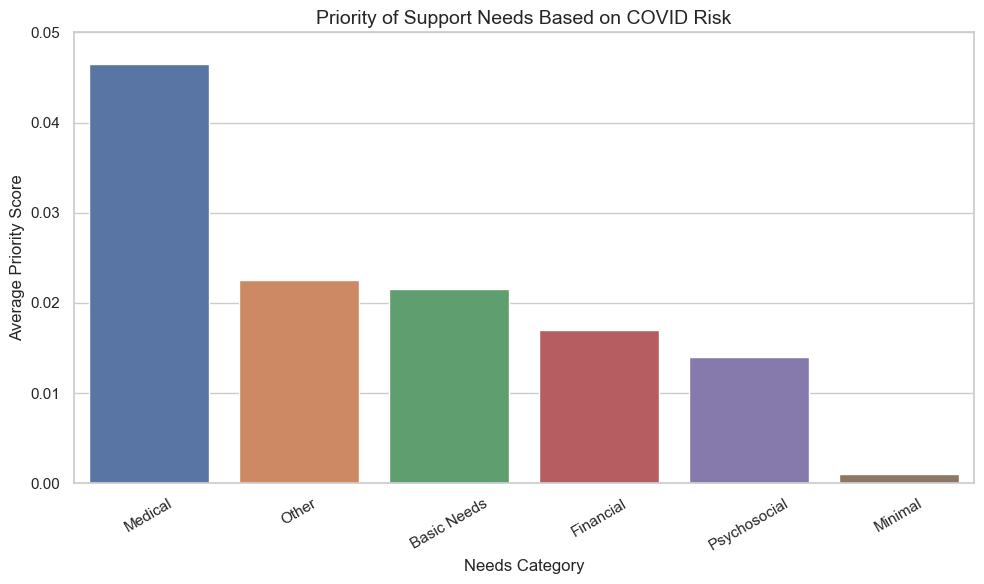

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# STEP 1: Map Needs to Categories
# ================================
needs_mapping = {
    'emotionalSupport': 'Psychosocial',
    'financialSupport': 'Financial',
    'food': 'Basic Needs',
    'medication': 'Medical',
    'other': 'Other',
    'noneOfTheAbove': 'Minimal',
    'NR': 'Minimal'
}

def map_needs(value):
    if pd.isna(value):
        return 'Minimal'
    return needs_mapping.get(value, 'Minimal')

df['needs_category'] = df['needs'].apply(map_needs)

# =====================================
# STEP 2: Derive Comorbidities Count
# =====================================
def count_comorbidities(val):
    if pd.isna(val) or val in ['NR', 'na', '']:
        return 0
    return len([c for c in val.split(';') if c.strip().lower() != 'nr'])

df['comorbidities_count'] = df['conditions'].apply(count_comorbidities)

# =====================================
# STEP 3: Normalize Risk Factors
# =====================================
df['covid_risk_norm'] = (
    df['covid_positive_flag'] / df['covid_positive_flag'].max()
)

df['comorbidity_risk_norm'] = (
    df['comorbidities_count'] / df['comorbidities_count'].max()
)

# =====================================
# STEP 4: Composite Priority Score
# =====================================
# 50% COVID risk + 50% comorbidity burden
df['priority_score'] = (
    0.5 * df['covid_risk_norm'] +
    0.5 * df['comorbidity_risk_norm']
)

# =====================================
# STEP 5: Aggregate by Needs Category
# =====================================
needs_priority = (
    df.groupby('needs_category', observed=True)
      .agg(
          avg_priority=('priority_score', 'mean'),
          patient_count=('priority_score', 'count')
      )
      .reset_index()
      .sort_values('avg_priority', ascending=False)
)

print("\nNeeds-Based Prescriptive Priority Summary:")
print(needs_priority)

# =====================================
# STEP 6: Visualization
# =====================================
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

sns.barplot(
    x='needs_category',
    y='avg_priority',
    data=needs_priority,
    hue='needs_category',
    dodge=False,
    legend=False
)

plt.title('Priority of Support Needs Based on COVID Risk', fontsize=14)
plt.xlabel('Needs Category')
plt.ylabel('Average Priority Score')
plt.ylim(0, 0.05)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
The needs‑based analysis shows that Medical needs carry the highest priority despite a smaller population, indicating a concentrated group requiring urgent, high‑touch support. Other, Basic Needs, and Financial categories show moderate priority with larger populations, suggesting broader but less acute service demands. Psychosocial needs present lower average priority but still represent a meaningful segment for preventive outreach. The Minimal group, which accounts for the majority of respondents, shows negligible priority and does not require targeted intervention. Overall, resources should be directed first toward individuals with Medical needs, while scalable support programs should address Basic, Financial, and Other needs, complemented by ongoing monitoring of Psychosocial cases.</em></strong></p>

<p style="font-family: Cambria; font-size: 16px;"><i><b>Q5. Question:Which combinations of geographic areas (FSA), age groups, and patient needs should be prioritized to maximize the impact of COVID-related interventions?</i>
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: Not all FSAs or age groups are affected by COVID in the same way, and patients’ needs vary widely. Some neighborhoods may have many older adults requiring medical or psychosocial support, while others may have younger populations with mental health or financial assistance needs. By combining FSA, age, and needs, we can calculate a composite priority score that accounts for COVID positivity rates, comorbidity burden, severity or risk indicators, and the frequency and type of reported needs. This approach enables public health teams to allocate resources efficiently, targeting high-risk areas and high-impact patient groups rather than distributing interventions uniformly.


✅ Valid needs categories:
['emotionalsupport' 'financialsupport' 'food' 'medication']

✅ First 10 grouped rows:
   fsa age_category       needs_clean  patient_count  positive_cases  \
0  K0A        26-44  emotionalsupport             21               0   
1  K0A        26-44  financialsupport              6               0   
2  K0A        26-44              food             10               0   
3  K0A        26-44        medication              1               0   
4  K0A        45-64  emotionalsupport             13               0   
5  K0A        45-64  financialsupport              6               0   
6  K0A        45-64              food             22               0   
7  K0A        45-64        medication              1               0   
8  K0A          <26  emotionalsupport              3               0   
9  K0A          <26  financialsupport              3               0   

   avg_comorbidities  vulnerable_count  positivity_rate  vulnerability_rate  
0           0.19

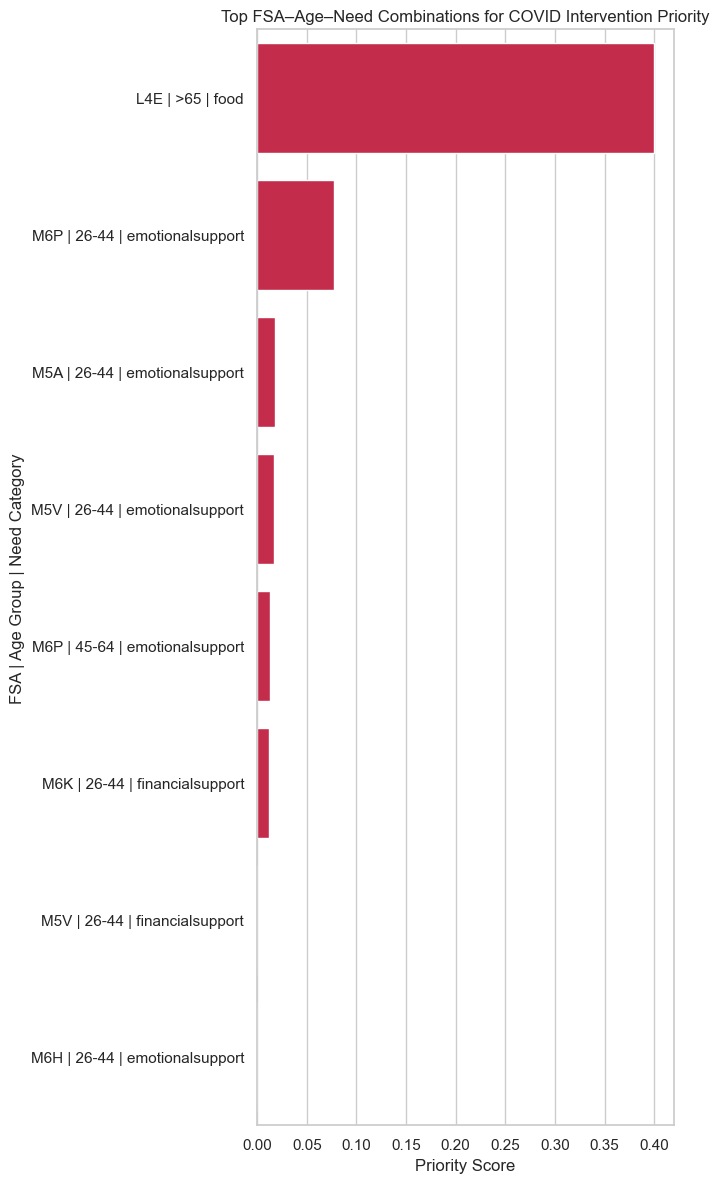

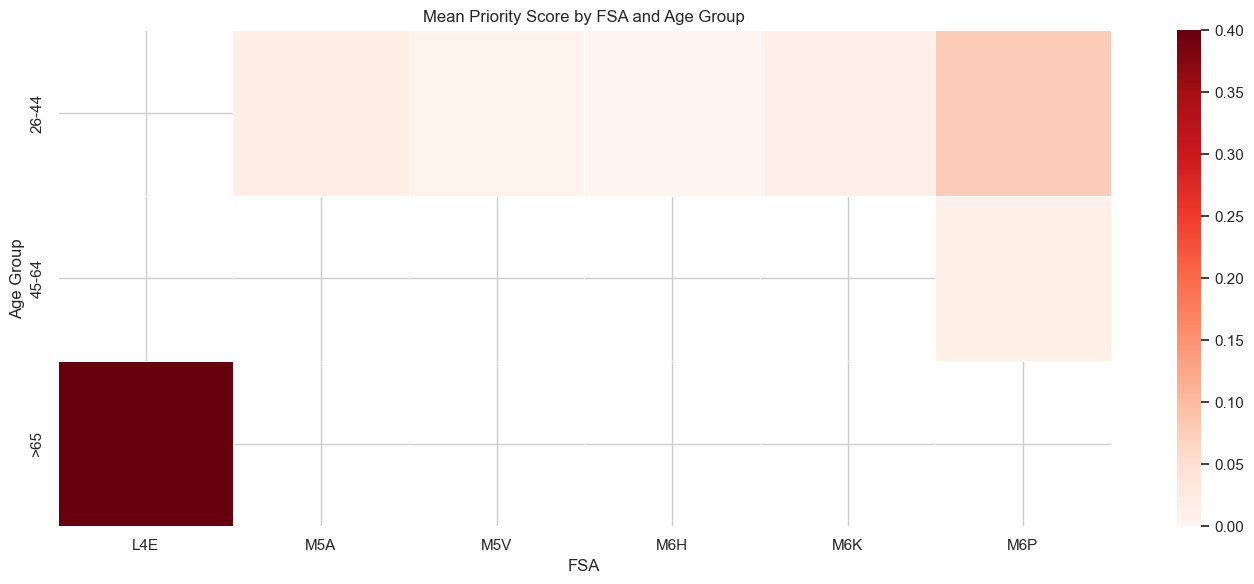

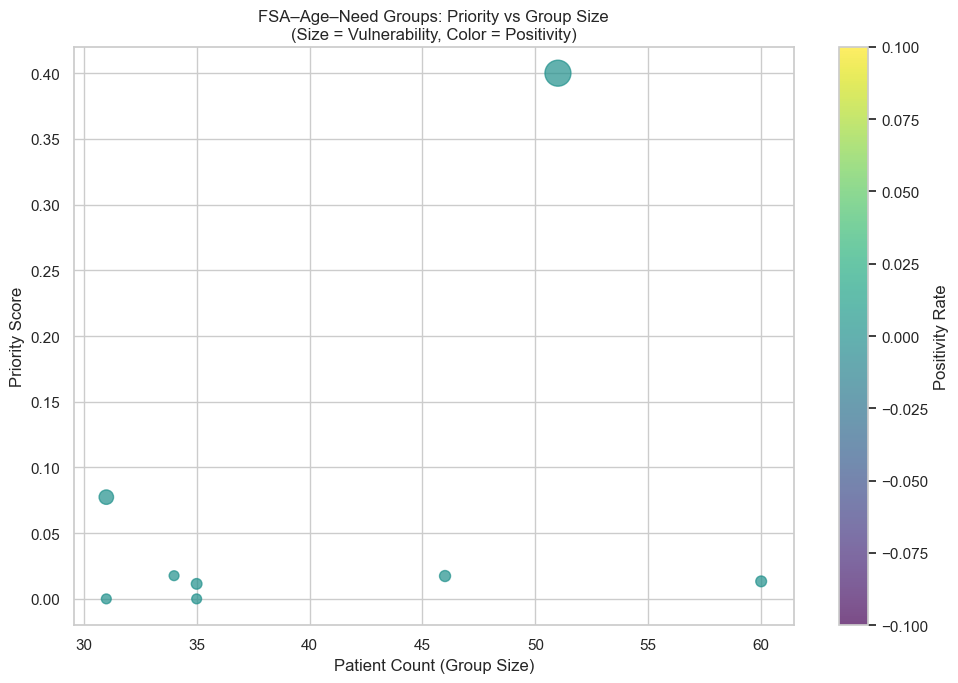

In [14]:
sns.set(style="whitegrid")

# ---------------------------------------------------------
# STEP 0 — CLEANING & FLAG CREATION
# ---------------------------------------------------------

# COVID positive flag
df['covid_positive_flag'] = df['covid_positive'].str.lower().apply(
    lambda x: 1 if x in ['y', 'yes', 'positive', '1'] else 0
)

# Vulnerable flag
df['vulnerable_flag'] = df['vulnerable'].str.lower().apply(
    lambda x: 1 if x in ['y', 'yes', '1'] else 0
)

# Comorbidity count
def count_comorbidities(x):
    if pd.isna(x):
        return 0
    x = str(x).strip().lower()
    if x in ["not reported", "none", "nr", "no", ""]:
        return 0
    return len([c for c in x.split(',') if c.strip() != ""])

df['comorbidities_count'] = df['conditions'].apply(count_comorbidities)

# Clean needs column and exclude invalid values
invalid_needs = ["nr", "noneoftheabove", "other", "none", "not reported"]
df['needs_clean'] = df['needs'].str.lower().str.strip()
df = df[~df['needs_clean'].isin(invalid_needs)]

print("\n✅ Valid needs categories:")
print(df['needs_clean'].unique())


# ---------------------------------------------------------
# STEP 1 — GROUP BY FSA × AGE × NEEDS
# ---------------------------------------------------------

group_cols = ['fsa', 'age_category', 'needs_clean']

group_summary = (
    df.groupby(group_cols)
      .agg(
          patient_count=('covid_positive_flag', 'count'),
          positive_cases=('covid_positive_flag', 'sum'),
          avg_comorbidities=('comorbidities_count', 'mean'),
          vulnerable_count=('vulnerable_flag', 'sum')
      )
      .reset_index()
)

# Rates
group_summary['positivity_rate'] = (
    group_summary['positive_cases'] / group_summary['patient_count']
).fillna(0)

group_summary['vulnerability_rate'] = (
    group_summary['vulnerable_count'] / group_summary['patient_count']
).fillna(0)

print("\n✅ First 10 grouped rows:")
print(group_summary.head(10))


# ---------------------------------------------------------
# STEP 2 — FILTER OUT SMALL GROUPS
# ---------------------------------------------------------

min_group_size = 30
group_summary = group_summary[group_summary['patient_count'] >= min_group_size]

print(f"\n✅ Groups with ≥ {min_group_size} patients:", len(group_summary))


# ---------------------------------------------------------
# STEP 3 — NORMALIZATION
# ---------------------------------------------------------

def safe_norm(series):
    return series / series.max() if series.max() > 0 else 0

group_summary['norm_positive_cases'] = safe_norm(group_summary['positive_cases'])
group_summary['norm_positivity_rate'] = safe_norm(group_summary['positivity_rate'])
group_summary['norm_comorbidities'] = safe_norm(group_summary['avg_comorbidities'])
group_summary['norm_vulnerability'] = safe_norm(group_summary['vulnerability_rate'])


# ---------------------------------------------------------
# STEP 4 — PRIORITY SCORE
# ---------------------------------------------------------

w_positive_cases = 0.35
w_positivity_rate = 0.25
w_comorbidities = 0.20
w_vulnerability = 0.20

group_summary['priority_score'] = (
    w_positive_cases * group_summary['norm_positive_cases'] +
    w_positivity_rate * group_summary['norm_positivity_rate'] +
    w_comorbidities * group_summary['norm_comorbidities'] +
    w_vulnerability * group_summary['norm_vulnerability']
)


# ---------------------------------------------------------
# STEP 5 — TOP PRIORITY COMBINATIONS
# ---------------------------------------------------------

top_n = 15
top_groups = group_summary.sort_values('priority_score', ascending=False).head(top_n)

print(f"\n Top {top_n} FSA–Age–Needs combinations:")
print(top_groups[[
    'fsa', 'age_category', 'needs_clean',
    'priority_score', 'patient_count',
    'positive_cases', 'positivity_rate',
    'avg_comorbidities', 'vulnerability_rate'
]])


# ---------------------------------------------------------
# STEP 6 — VISUALIZATION 1: BAR CHART OF TOP GROUPS
# ---------------------------------------------------------

top_groups['combo_label'] = (
    top_groups['fsa'] + " | " +
    top_groups['age_category'] + " | " +
    top_groups['needs_clean']
)

plt.figure(figsize=(7, 12))
sns.barplot(
    data=top_groups,
    x='priority_score',
    y='combo_label',
    color='crimson'
)
plt.xlabel('Priority Score')
plt.ylabel('FSA | Age Group | Need Category')
plt.title('Top FSA–Age–Need Combinations for COVID Intervention Priority')
plt.tight_layout()
plt.show()


# ---------------------------------------------------------
# STEP 7 — VISUALIZATION 2: HEATMAP (FSA × AGE)
# ---------------------------------------------------------

fsa_age_summary = (
    group_summary.groupby(['fsa', 'age_category'])
    .agg(mean_priority=('priority_score', 'mean'))
    .reset_index()
)

heatmap_data = fsa_age_summary.pivot(
    index='age_category',
    columns='fsa',
    values='mean_priority'
)

plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_data,
    cmap='Reds',
    linewidths=0.5
)
plt.title('Mean Priority Score by FSA and Age Group')
plt.xlabel('FSA')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()


# ---------------------------------------------------------
# STEP 8 — VISUALIZATION 3: SCATTER PLOT
# ---------------------------------------------------------

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    group_summary['patient_count'],
    group_summary['priority_score'],
    c=group_summary['positivity_rate'],
    s=50 + 300 * group_summary['vulnerability_rate'],
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label='Positivity Rate')
plt.xlabel('Patient Count (Group Size)')
plt.ylabel('Priority Score')
plt.title('FSA–Age–Need Groups: Priority vs Group Size\n(Size = Vulnerability, Color = Positivity)')
plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
The analysis identifies a small set of FSA–age–needs groups that warrant focused attention, with the highest priority seen in older adults (>65) in FSA L4E requiring food support, driven by the highest comorbidity and vulnerability levels. Several mid‑priority groups emerge among working‑age adults (26–44 and 45–64) in FSAs M6P, M5A, M5V, and M6H, primarily linked to emotional‑support needs, reflecting psychosocial strain despite low COVID positivity. Financial‑support needs appear but with lower vulnerability indicators. Overall, interventions should prioritize L4E older adults, followed by targeted psychosocial outreach for emotionally distressed adults in the identified FSAs, while maintaining routine monitoring of lower‑risk groups.</em></strong></p>

## <b style="font-family: Cambria; font-size: 16px;"><i> 6.Question:Which patient groups (based on demographics, comorbidities, and symptoms) should be prioritized for COVID-related interventions to reduce risk and improve outcomes?</i><b>

## <b style="font-family: Cambria; font-size: 16px;"><i> Reasoning:Not all patients are equally vulnerable to COVID. Certain marker groups, defined by combinations of age, comorbidities, and reported needs, carry higher risk of severe infection or complications. By analyzing the dataset, we can identify high-risk age groups, FSAs, or comorbidity clusters, while also considering severity of symptoms, positivity rates, or hospitalization likelihood. Combining these factors into a composite risk score allows public health teams to target interventions such as testing, vaccination, or social support effectively. This approach mirrors clinical prioritization—just as high-risk GDM patients are monitored closely, high-risk COVID marker groups receive focused attention.</i><b>

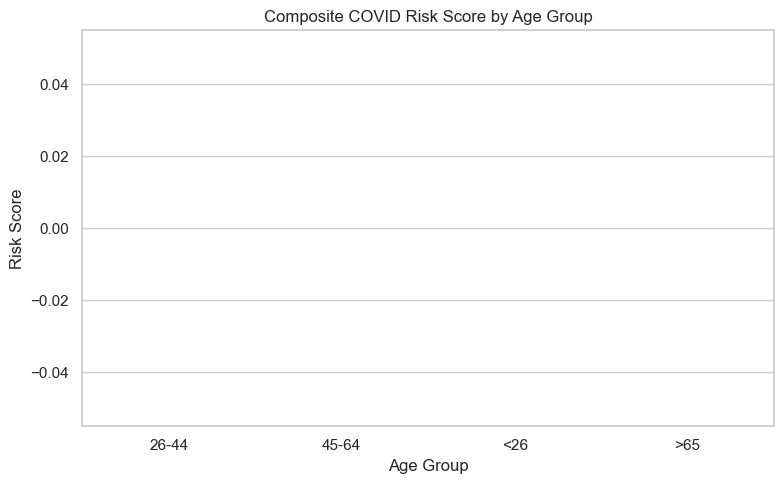

In [15]:


import seaborn as sns
import matplotlib.pyplot as plt

# Remove NR
df_clean = df[df['age_category'] != 'NR'].copy()

# Count comorbidities
df_clean['comorbidities_count'] = df_clean['conditions'].apply(
    lambda x: 0 if x in ['NR', 'na'] else len(x.split(';'))
)

# Aggregate by age
age_summary = df_clean.groupby('age_category').agg(
    total_cases=('covid_positive_flag', 'count'),
    positive_cases=('covid_positive_flag', 'sum'),
    avg_comorbidities=('comorbidities_count', 'mean')
).reset_index()

# Risk score
age_summary['positivity_rate'] = age_summary['positive_cases'] / age_summary['total_cases']
age_summary['risk_score'] = (
    0.5 * (age_summary['positivity_rate'] / age_summary['positivity_rate'].max()) +
    0.5 * (age_summary['avg_comorbidities'] / age_summary['avg_comorbidities'].max())
)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=age_summary, x='age_category', y='risk_score', color='salmon')
plt.title('Composite COVID Risk Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Risk Score')
plt.tight_layout()
plt.show()


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10817 entries, 263642 to 294101
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   week                          10817 non-null  object 
 1   fsa                           10817 non-null  object 
 2   probable                      10817 non-null  object 
 3   vulnerable                    10817 non-null  object 
 4   is_most_recent                4785 non-null   object 
 5   fever_chills_shakes           10817 non-null  object 
 6   cough                         10817 non-null  object 
 7   shortness_of_breath           10817 non-null  object 
 8   over_60                       819 non-null    object 
 9   any_medical_conditions        10817 non-null  object 
 10  travel_outside_canada         10817 non-null  object 
 11  contact_with_illness          10817 non-null  object 
 12  symptoms                      10817 non-null  object 
 13  

<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>older adults with multiple comorbidities and persistent or severe symptoms represent the highest-priority marker group, while younger patients with specific comorbidities or needs may emerge as secondary priority groups, ensuring resources are allocated for maximum impact.</em></strong></p>